In [1]:
!pip install scipy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder  

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', None)

In [3]:
import os
print(os.getcwd())

/root/miniconda3/envs/exoplanets_with_ai/main/notebooks


In [4]:
data = pd.read_csv("/root/miniconda3/envs/exoplanets_with_ai/main/data/TESS Dataset.csv", skiprows=90, index_col="rowid")

In [5]:
data.shape

(7668, 86)

In [6]:
data.columns

Index(['toi', 'toipfx', 'tid', 'ctoi_alias', 'pl_pnum', 'tfopwg_disp', 'rastr',
       'ra', 'raerr1', 'raerr2', 'decstr', 'dec', 'decerr1', 'decerr2',
       'st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmralim', 'st_pmrasymerr',
       'st_pmdec', 'st_pmdecerr1', 'st_pmdecerr2', 'st_pmdeclim',
       'st_pmdecsymerr', 'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2',
       'pl_tranmidlim', 'pl_tranmidsymerr', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbpersymerr', 'pl_trandurh',
       'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandurhlim',
       'pl_trandurhsymerr', 'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2',
       'pl_trandeplim', 'pl_trandepsymerr', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radesymerr', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_insolsymerr',
       'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'pl_eqtsymerr',
       'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_tmagli

In [7]:
for column in data.columns:
    if len(data[column].value_counts())==0:
        data.drop(column, axis="columns", inplace=True)

In [8]:
data.shape

(7668, 74)

In [9]:
data.head()

,toi,toipfx,tid,ctoi_alias,pl_pnum,tfopwg_disp,rastr,ra,decstr,dec,...,st_loggerr2,st_logglim,st_loggsymerr,st_rad,st_raderr1,st_raderr2,st_radlim,st_radsymerr,toi_created,rowupdate
rowid,,,,,,,,,,,,,,,,,,,,,
1,1000.01,1000,50365310,50365310.01,1,FP,07h29m25.85s,112.36,-12d41m45.46s,-12.70,...,-0.07,0,1,2.17,0.07,-0.07,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01
2,1001.01,1001,88863718,88863718.01,1,PC,08h10m19.31s,122.58,-05d30m49.87s,-5.51,...,-0.09,0,1,2.01,0.09,-0.09,0,1,2019-07-24 15:58:33,2023-04-03 14:31:04
3,1002.01,1002,124709665,124709665.01,1,FP,06h58m54.47s,104.73,-10d34m49.64s,-10.58,...,NaN,0,1,5.73,NaN,NaN,0,1,2019-07-24 15:58:33,2022-07-11 16:02:02
4,1003.01,1003,106997505,106997505.01,1,FP,07h22m14.39s,110.56,-25d12m25.26s,-25.21,...,-1.64,0,1,NaN,NaN,NaN,0,1,2019-07-24 15:58:33,2022-02-23 10:10:02
5,1004.01,1004,238597883,238597883.01,1,FP,08h08m42.77s,122.18,-48d48m10.12s,-48.80,...,-0.07,0,1,2.15,0.06,-0.06,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01


In [10]:
data.columns

Index(['toi', 'toipfx', 'tid', 'ctoi_alias', 'pl_pnum', 'tfopwg_disp', 'rastr',
       'ra', 'decstr', 'dec', 'st_pmra', 'st_pmraerr1', 'st_pmraerr2',
       'st_pmralim', 'st_pmrasymerr', 'st_pmdec', 'st_pmdecerr1',
       'st_pmdecerr2', 'st_pmdeclim', 'st_pmdecsymerr', 'pl_tranmid',
       'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_tranmidlim', 'pl_tranmidsymerr',
       'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim',
       'pl_orbpersymerr', 'pl_trandurh', 'pl_trandurherr1', 'pl_trandurherr2',
       'pl_trandurhlim', 'pl_trandurhsymerr', 'pl_trandep', 'pl_trandeperr1',
       'pl_trandeperr2', 'pl_trandeplim', 'pl_trandepsymerr', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radesymerr', 'pl_insol',
       'pl_eqt', 'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_tmaglim',
       'st_tmagsymerr', 'st_dist', 'st_disterr1', 'st_disterr2', 'st_distlim',
       'st_distsymerr', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim',
       'st_teffsymerr',

In [11]:
data.describe()

,toi,toipfx,tid,ctoi_alias,pl_pnum,ra,dec,st_pmra,st_pmraerr1,st_pmraerr2,...,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_loggsymerr,st_rad,st_raderr1,st_raderr2,st_radlim,st_radsymerr
count,7668.00,7668.00,7668.00,7668.00,7668.00,7668.00,7668.00,7534.00,7534.00,7534.00,...,6812.00,5411.00,5411.00,7668.00,7668.00,7163.00,5718.00,5718.00,7668.00,7668.00
mean,3731.95,3731.94,245711900.77,245711900.78,1.05,179.32,1.28,-0.61,0.23,-0.23,...,4.31,0.18,-0.18,0.00,1.00,1.40,0.07,-0.07,0.00,1.00
std,2142.32,2142.32,161777703.41,161777703.41,0.27,103.60,47.53,77.17,0.63,0.63,...,0.30,0.35,0.35,0.00,0.00,1.60,0.08,0.08,0.00,0.00
min,101.01,101.00,2876.00,2876.01,1.00,0.08,-89.47,-1624.05,0.01,-8.00,...,0.10,0.00,-2.01,0.00,1.00,0.11,0.00,-1.72,0.00,1.00
25%,1852.76,1852.75,131581528.75,131581528.76,1.00,95.81,-43.38,-10.65,0.04,-0.08,...,4.12,0.08,-0.09,0.00,1.00,0.89,0.05,-0.08,0.00,1.00
50%,3718.51,3718.50,250248207.00,250248207.01,1.00,160.82,5.19,-1.59,0.05,-0.05,...,4.33,0.08,-0.08,0.00,1.00,1.24,0.06,-0.06,0.00,1.00
75%,5590.26,5590.25,354201686.75,354201686.76,1.00,282.18,44.03,8.21,0.08,-0.04,...,4.50,0.09,-0.08,0.00,1.00,1.66,0.08,-0.05,0.00,1.00
max,7475.01,7475.00,2041563029.00,2041563029.01,5.00,359.94,89.09,2074.52,8.00,-0.01,...,5.96,2.01,-0.00,0.00,1.00,102.03,1.72,-0.00,0.00,1.00


In [12]:
for column in data.columns:
    if data[column].min()==0 and data[column].max()==0:
        data.drop(column, axis="columns", inplace=True)

In [13]:
data.describe()

,toi,toipfx,tid,ctoi_alias,pl_pnum,ra,dec,st_pmra,st_pmraerr1,st_pmraerr2,...,st_tefferr2,st_teffsymerr,st_logg,st_loggerr1,st_loggerr2,st_loggsymerr,st_rad,st_raderr1,st_raderr2,st_radsymerr
count,7668.00,7668.00,7668.00,7668.00,7668.00,7668.00,7668.00,7534.00,7534.00,7534.00,...,7195.00,7668.00,6812.00,5411.00,5411.00,7668.00,7163.00,5718.00,5718.00,7668.00
mean,3731.95,3731.94,245711900.77,245711900.78,1.05,179.32,1.28,-0.61,0.23,-0.23,...,-205.91,1.00,4.31,0.18,-0.18,1.00,1.40,0.07,-0.07,1.00
std,2142.32,2142.32,161777703.41,161777703.41,0.27,103.60,47.53,77.17,0.63,0.63,...,551.32,0.00,0.30,0.35,0.35,0.00,1.60,0.08,0.08,0.00
min,101.01,101.00,2876.00,2876.01,1.00,0.08,-89.47,-1624.05,0.01,-8.00,...,-7000.00,1.00,0.10,0.00,-2.01,1.00,0.11,0.00,-1.72,1.00
25%,1852.76,1852.75,131581528.75,131581528.76,1.00,95.81,-43.38,-10.65,0.04,-0.08,...,-157.00,1.00,4.12,0.08,-0.09,1.00,0.89,0.05,-0.08,1.00
50%,3718.51,3718.50,250248207.00,250248207.01,1.00,160.82,5.19,-1.59,0.05,-0.05,...,-129.40,1.00,4.33,0.08,-0.08,1.00,1.24,0.06,-0.06,1.00
75%,5590.26,5590.25,354201686.75,354201686.76,1.00,282.18,44.03,8.21,0.08,-0.04,...,-122.00,1.00,4.50,0.09,-0.08,1.00,1.66,0.08,-0.05,1.00
max,7475.01,7475.00,2041563029.00,2041563029.01,5.00,359.94,89.09,2074.52,8.00,-0.01,...,-4.40,1.00,5.96,2.01,-0.00,1.00,102.03,1.72,-0.00,1.00


In [14]:
data.columns

Index(['toi', 'toipfx', 'tid', 'ctoi_alias', 'pl_pnum', 'tfopwg_disp', 'rastr',
       'ra', 'decstr', 'dec', 'st_pmra', 'st_pmraerr1', 'st_pmraerr2',
       'st_pmrasymerr', 'st_pmdec', 'st_pmdecerr1', 'st_pmdecerr2',
       'st_pmdecsymerr', 'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2',
       'pl_tranmidsymerr', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2',
       'pl_orbpersymerr', 'pl_trandurh', 'pl_trandurherr1', 'pl_trandurherr2',
       'pl_trandurhsymerr', 'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2',
       'pl_trandepsymerr', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2',
       'pl_radesymerr', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_tmagerr1',
       'st_tmagerr2', 'st_tmagsymerr', 'st_dist', 'st_disterr1', 'st_disterr2',
       'st_distsymerr', 'st_teff', 'st_tefferr1', 'st_tefferr2',
       'st_teffsymerr', 'st_logg', 'st_loggerr1', 'st_loggerr2',
       'st_loggsymerr', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radsymerr',
       'toi_created', 'rowupdate'],
      dtype

In [15]:
data.shape

(7668, 62)

In [16]:
data.isnull().sum()

toi                     0
toipfx                  0
tid                     0
ctoi_alias              0
pl_pnum                 0
tfopwg_disp             0
rastr                   0
ra                      0
decstr                  0
dec                     0
st_pmra               134
st_pmraerr1           134
st_pmraerr2           134
st_pmrasymerr         134
st_pmdec              134
st_pmdecerr1          134
st_pmdecerr2          134
st_pmdecsymerr        134
pl_tranmid              0
pl_tranmiderr1         11
pl_tranmiderr2         11
pl_tranmidsymerr        0
pl_orbper             106
pl_orbpererr1         130
pl_orbpererr2         130
pl_orbpersymerr         0
pl_trandurh             0
pl_trandurherr1        13
pl_trandurherr2        13
pl_trandurhsymerr       0
pl_trandep              0
pl_trandeperr1          6
pl_trandeperr2          6
pl_trandepsymerr        0
pl_rade               504
pl_radeerr1          1621
pl_radeerr2          1621
pl_radesymerr           0
pl_insol    

## Recude Uncertainty Columns

In [17]:
print(data[["st_pmra", "st_pmraerr1", "st_pmraerr2"]])

       st_pmra  st_pmraerr1  st_pmraerr2
rowid                                   
1        -5.96         0.09        -0.09
2        -4.96         0.10        -0.10
3        -1.46         0.21        -0.21
4        -0.94         0.04        -0.04
5        -4.50         0.07        -0.07
6       -26.93         1.94        -1.94
7       -29.10         2.60        -2.60
8         0.36         0.06        -0.06
9       -17.90         1.10        -1.10
10       -3.30         0.32        -0.32
11       12.64         0.04        -0.04
12       -5.75         0.18        -0.18
13      145.10         0.05        -0.05
14       -2.99         0.20        -0.20
15       -3.97         0.06        -0.06
16      -13.06         0.08        -0.08
17        1.57         0.05        -0.05
18       -9.23         0.05        -0.05
19      -11.28         0.04        -0.04
20       -8.02         0.05        -0.05
21      -11.73         0.05        -0.05
22      -15.64         0.04        -0.04
23       -5.81  

In [18]:
data_reduced_err = data.copy()

In [19]:
for column in data_reduced_err.columns:
    if column.endswith("err1") or column.endswith("err2") or column.endswith("err"):
        data_reduced_err.drop(column, axis=1, inplace=True)

In [20]:
data_reduced_err.shape

(7668, 26)

In [21]:
data_reduced_err.isnull().sum()

toi              0
toipfx           0
tid              0
ctoi_alias       0
pl_pnum          0
tfopwg_disp      0
rastr            0
ra               0
decstr           0
dec              0
st_pmra        134
st_pmdec       134
pl_tranmid       0
pl_orbper      106
pl_trandurh      0
pl_trandep       0
pl_rade        504
pl_insol       176
pl_eqt         311
st_tmag          0
st_dist        215
st_teff        161
st_logg        856
st_rad         505
toi_created      0
rowupdate        0
dtype: int64

In [22]:
for column in data_reduced_err.columns:
    if data_reduced_err[column].min()==data_reduced_err[column].max():
        data_reduced_err.drop(column, axis="columns", inplace=True)

In [23]:
data_reduced_err.shape

(7668, 26)

In [24]:
data_reduced_err.isnull().sum()

toi              0
toipfx           0
tid              0
ctoi_alias       0
pl_pnum          0
tfopwg_disp      0
rastr            0
ra               0
decstr           0
dec              0
st_pmra        134
st_pmdec       134
pl_tranmid       0
pl_orbper      106
pl_trandurh      0
pl_trandep       0
pl_rade        504
pl_insol       176
pl_eqt         311
st_tmag          0
st_dist        215
st_teff        161
st_logg        856
st_rad         505
toi_created      0
rowupdate        0
dtype: int64

In [25]:
data_reduced_err.shape

(7668, 26)

## Reduce TESS Identification Columns

In [26]:
data_reduced_id = data_reduced_err.copy()

In [27]:
id_col = ["rowupdate", "toi_created", "ctoi_alias", "tid", "toipfx", "toi"]
str_col = ["rastr", "decstr"]

for column in id_col:
    data_reduced_id.drop(column, axis="columns", inplace=True)
for column in str_col:
    data_reduced_id.drop(column, axis="columns", inplace=True)

In [28]:
data_reduced_id.shape

(7668, 18)

In [29]:
data_reduced_id.isnull().sum()

pl_pnum          0
tfopwg_disp      0
ra               0
dec              0
st_pmra        134
st_pmdec       134
pl_tranmid       0
pl_orbper      106
pl_trandurh      0
pl_trandep       0
pl_rade        504
pl_insol       176
pl_eqt         311
st_tmag          0
st_dist        215
st_teff        161
st_logg        856
st_rad         505
dtype: int64

In [30]:
data_reduced_id.head()

,pl_pnum,tfopwg_disp,ra,dec,st_pmra,st_pmdec,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_tmag,st_dist,st_teff,st_logg,st_rad
rowid,,,,,,,,,,,,,,,,,,
1,1,FP,112.36,-12.70,-5.96,-0.08,2459229.63,2.17,2.02,656.89,5.82,22601.95,3127.20,9.60,485.74,10249.00,4.19,2.17
2,1,PC,122.58,-5.51,-4.96,-15.55,2459987.95,1.93,3.17,1286.00,11.22,44464.50,4045.00,9.42,295.86,7070.00,4.03,2.01
3,1,FP,104.73,-10.58,-1.46,-2.25,2459224.69,1.87,1.41,1500.00,23.75,2860.61,2037.00,9.30,943.11,8924.00,NaN,5.73
4,1,FP,110.56,-25.21,-0.94,1.64,2458493.40,2.74,3.17,383.41,NaN,1177.36,1631.00,9.30,7728.17,5388.50,4.15,NaN
5,1,FP,122.18,-48.80,-4.50,9.35,2459987.05,3.57,3.37,755.00,11.31,54679.30,4260.00,9.14,356.44,9219.00,4.14,2.15


In [31]:
data_reduced_id.describe()

,pl_pnum,ra,dec,st_pmra,st_pmdec,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_tmag,st_dist,st_teff,st_logg,st_rad
count,7668.00,7668.00,7668.00,7534.00,7534.00,7668.00,7562.00,7668.00,7668.00,7164.00,7492.00,7357.00,7668.00,7453.00,7507.00,6812.00,7163.00
mean,1.05,179.32,1.28,-0.61,-9.17,2459546.31,17.81,3.06,8248.85,10.34,2250.63,1282.90,11.56,478.24,5793.00,4.31,1.40
std,0.27,103.60,47.53,77.17,66.98,610.57,97.96,1.87,17533.04,8.60,10933.78,686.93,1.63,558.71,1482.24,0.30,1.60
min,1.00,0.08,-89.47,-1624.05,-1230.62,2457925.87,0.15,0.10,24.58,0.55,0.00,37.00,4.63,6.53,2808.00,0.10,0.11
25%,1.00,95.81,-43.38,-10.65,-14.67,2459195.38,2.49,1.84,1415.00,4.49,85.24,813.04,10.39,178.37,5211.53,4.12,0.89
50%,1.00,160.82,5.19,-1.59,-3.45,2459578.21,4.09,2.73,4740.50,10.54,363.60,1183.03,11.84,364.96,5801.93,4.33,1.24
75%,1.00,282.18,44.03,8.21,4.92,2459988.07,7.94,3.80,10323.50,14.02,1161.70,1589.00,12.86,647.80,6297.10,4.50,1.66
max,5.00,359.94,89.09,2074.52,1048.84,2460794.22,1837.89,30.02,767910.31,297.11,280833.00,6413.00,18.33,14728.30,50000.00,5.96,102.03


## Analysis
We have 17 numeric features and 1 target feature "tfopwg_disp".

Rest of the deleted columns are metadata.

In [32]:
data_reduced_id.columns

Index(['pl_pnum', 'tfopwg_disp', 'ra', 'dec', 'st_pmra', 'st_pmdec',
       'pl_tranmid', 'pl_orbper', 'pl_trandurh', 'pl_trandep', 'pl_rade',
       'pl_insol', 'pl_eqt', 'st_tmag', 'st_dist', 'st_teff', 'st_logg',
       'st_rad'],
      dtype='object')

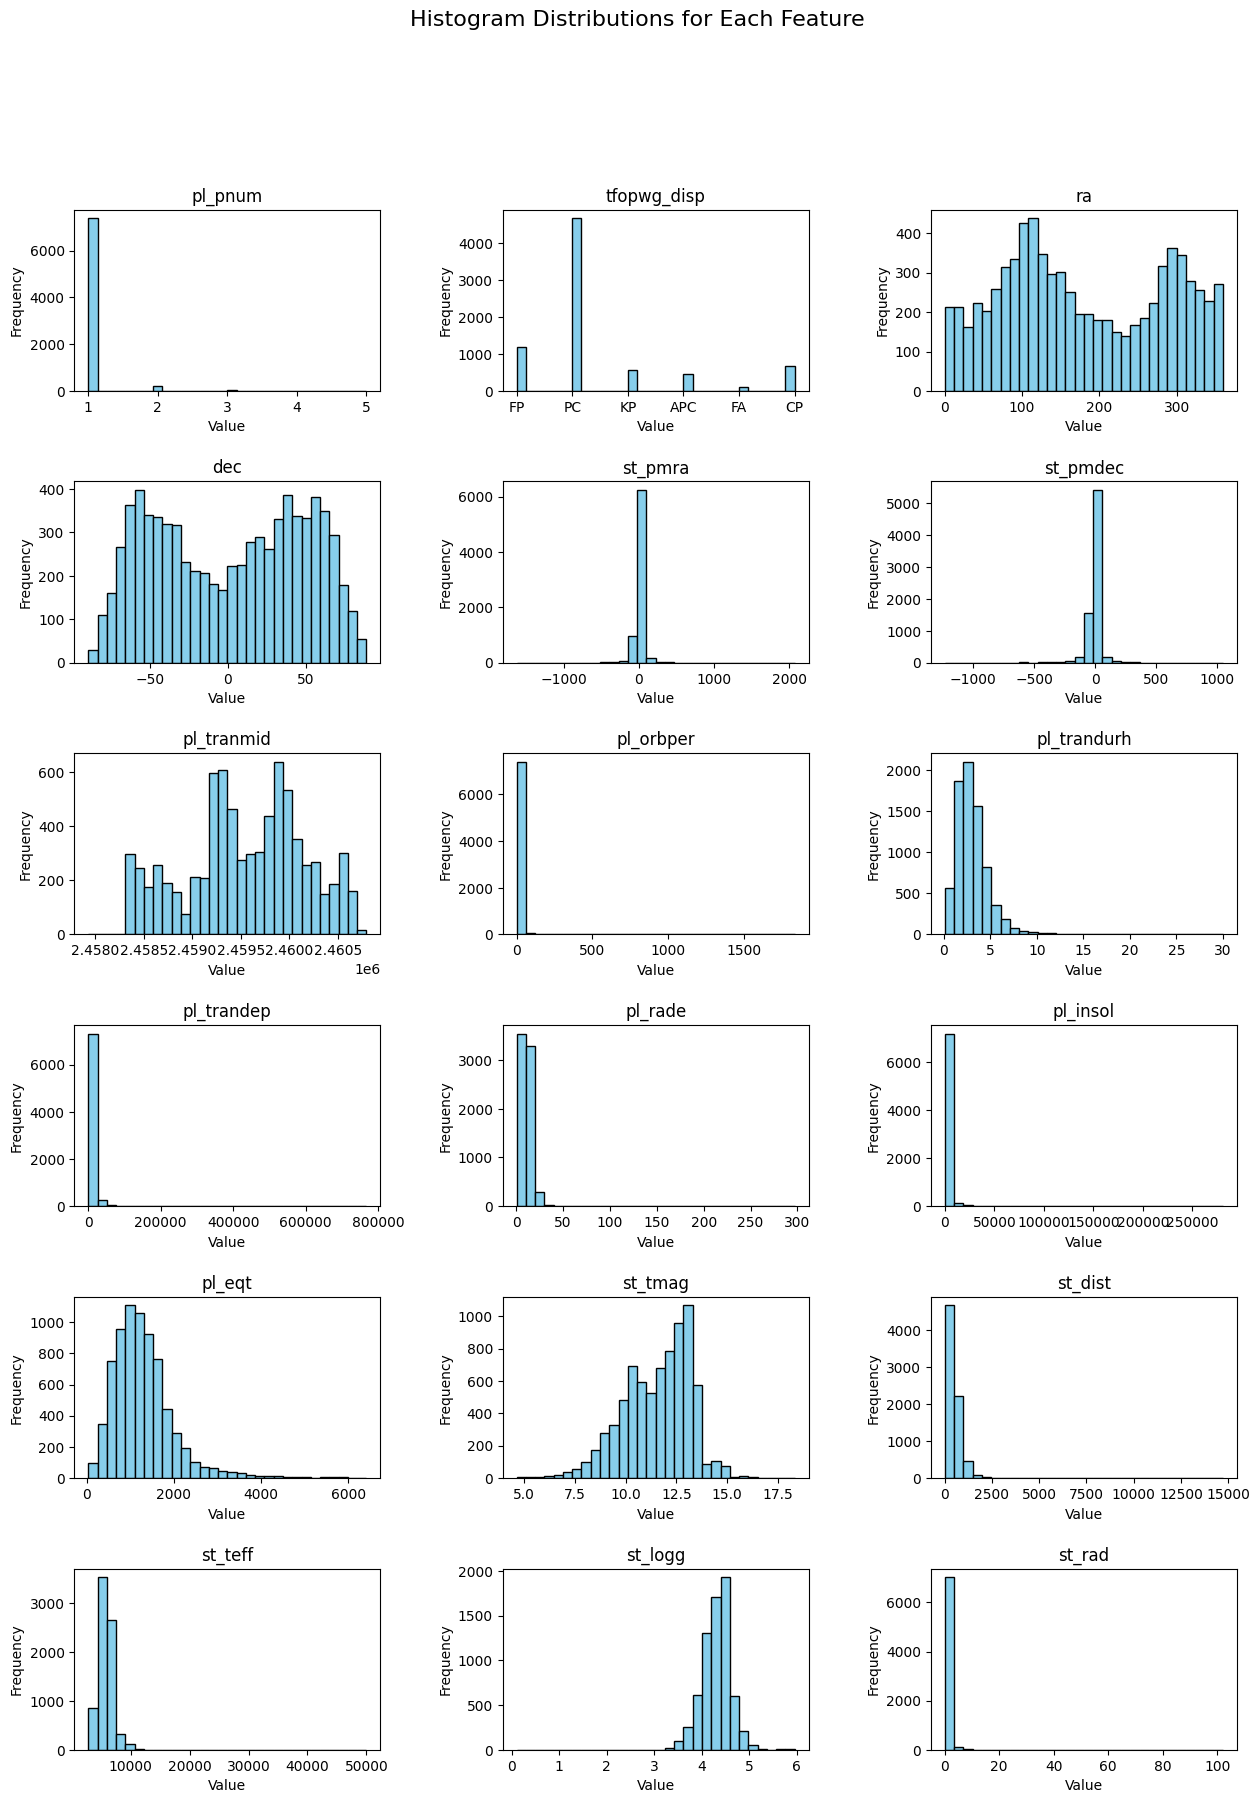

In [33]:
# Set up the plot grid (e.g., a 6x3 grid for 18 features)
n_rows = 6
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
fig.suptitle('Histogram Distributions for Each Feature', fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each feature and plot its histogram
for i, col in enumerate(data_reduced_id.columns):
    ax = axes[i]
    # Handle potential non-numeric data or nulls by dropping NaNs for the plot
    ax.hist(data_reduced_id[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for j in range(len(data_reduced_id.columns), len(axes)):
    axes[j].axis('off')

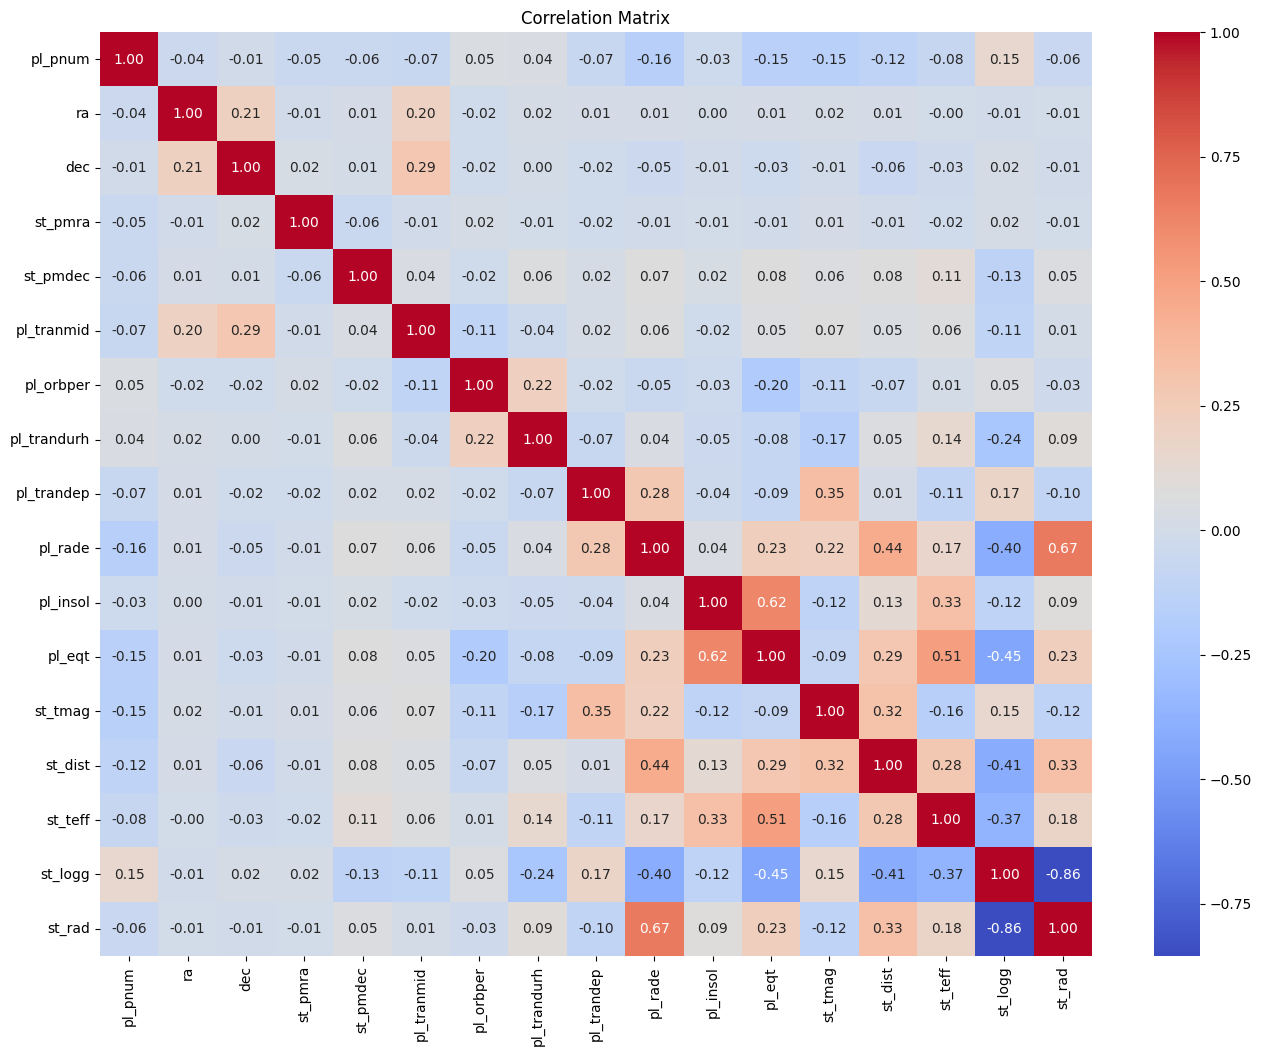

In [34]:
correlation_matrix = data_reduced_id.drop("tfopwg_disp", axis=1).corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

In [35]:
high_corr = ["st_logg"]
for column in high_corr:
    data_reduced_id.drop(column, axis="columns", inplace=True)

## Z-Score Outlier Detection and Removal

In [36]:
z_threshold = 3.5

# Calculate Z-scores for all features
z_scores = data_reduced_id.drop("tfopwg_disp", axis=1).apply(zscore)

# Create a boolean mask where True indicates an outlier
outlier_mask = np.abs(z_scores) > z_threshold

# Count the total number of outliers and the number of rows with at least one outlier
total_outliers = outlier_mask.sum().sum()
rows_with_outliers = outlier_mask.any(axis=1).sum()

# Create a new DataFrame with outliers removed
df_reduced_outliers = data_reduced_id[~outlier_mask.any(axis=1)]

print(data_reduced_id["tfopwg_disp"].value_counts())
print(f"Total number of outliers detected: {total_outliers}")
print(f"Number of rows to be removed: {rows_with_outliers}")
print(f"Original DataFrame shape: {data_reduced_id.shape}")
print(f"Cleaned DataFrame shape: {df_reduced_outliers.shape}")
df_reduced_outliers["class"] = data_reduced_id["tfopwg_disp"]
df_reduced_outliers.drop("tfopwg_disp", axis=1, inplace=True)
print(df_reduced_outliers["class"].value_counts())

tfopwg_disp
PC     4675
FP     1192
CP      679
KP      565
APC     459
FA       98
Name: count, dtype: int64
Total number of outliers detected: 198
Number of rows to be removed: 192
Original DataFrame shape: (7668, 17)
Cleaned DataFrame shape: (7476, 17)
class
PC     4579
FP     1174
CP      631
KP      547
APC     449
FA       96
Name: count, dtype: int64


/tmp/ipykernel_1085/1586517513.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced_outliers["class"] = data_reduced_id["tfopwg_disp"]
/tmp/ipykernel_1085/1586517513.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced_outliers.drop("tfopwg_disp", axis=1, inplace=True)


In [37]:
df_reduced_outliers.head()

,pl_pnum,ra,dec,st_pmra,st_pmdec,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_tmag,st_dist,st_teff,st_rad,class
rowid,,,,,,,,,,,,,,,,,
1,1,112.36,-12.70,-5.96,-0.08,2459229.63,2.17,2.02,656.89,5.82,22601.95,3127.20,9.60,485.74,10249.00,2.17,FP
2,1,122.58,-5.51,-4.96,-15.55,2459987.95,1.93,3.17,1286.00,11.22,44464.50,4045.00,9.42,295.86,7070.00,2.01,PC
3,1,104.73,-10.58,-1.46,-2.25,2459224.69,1.87,1.41,1500.00,23.75,2860.61,2037.00,9.30,943.11,8924.00,5.73,FP
4,1,110.56,-25.21,-0.94,1.64,2458493.40,2.74,3.17,383.41,NaN,1177.36,1631.00,9.30,7728.17,5388.50,NaN,FP
5,1,122.18,-48.80,-4.50,9.35,2459987.05,3.57,3.37,755.00,11.31,54679.30,4260.00,9.14,356.44,9219.00,2.15,FP


In [38]:
df_reduced_outliers.isnull().sum()

pl_pnum          0
ra               0
dec              0
st_pmra        134
st_pmdec       134
pl_tranmid       0
pl_orbper       76
pl_trandurh      0
pl_trandep       0
pl_rade        495
pl_insol       175
pl_eqt         310
st_tmag          0
st_dist        211
st_teff        161
st_rad         496
class            0
dtype: int64

In [39]:
df_reduced_outliers.shape

(7476, 17)

In [40]:
print(df_reduced_outliers["class"].value_counts())

class
PC     4579
FP     1174
CP      631
KP      547
APC     449
FA       96
Name: count, dtype: int64


In [41]:
df_cleaned = df_reduced_outliers.copy()

## Renaming the target

In [42]:
replace_map = {
    'CP': 'Confirmed Planet',
    'KP': 'Confirmed Planet',
    'FA': 'False Alarm',
    'FP': 'False Alarm',
    'PC': 'Possible Candidate',
    'APC': 'Possible Candidate'
}
df_cleaned['class'].replace(replace_map, inplace=True)

/tmp/ipykernel_1085/1962167987.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['class'].replace(replace_map, inplace=True)


In [43]:
df_cleaned.head()

,pl_pnum,ra,dec,st_pmra,st_pmdec,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_tmag,st_dist,st_teff,st_rad,class
rowid,,,,,,,,,,,,,,,,,
1,1,112.36,-12.70,-5.96,-0.08,2459229.63,2.17,2.02,656.89,5.82,22601.95,3127.20,9.60,485.74,10249.00,2.17,False Alarm
2,1,122.58,-5.51,-4.96,-15.55,2459987.95,1.93,3.17,1286.00,11.22,44464.50,4045.00,9.42,295.86,7070.00,2.01,Possible Candidate
3,1,104.73,-10.58,-1.46,-2.25,2459224.69,1.87,1.41,1500.00,23.75,2860.61,2037.00,9.30,943.11,8924.00,5.73,False Alarm
4,1,110.56,-25.21,-0.94,1.64,2458493.40,2.74,3.17,383.41,NaN,1177.36,1631.00,9.30,7728.17,5388.50,NaN,False Alarm
5,1,122.18,-48.80,-4.50,9.35,2459987.05,3.57,3.37,755.00,11.31,54679.30,4260.00,9.14,356.44,9219.00,2.15,False Alarm


In [44]:
df_cleaned["class"].value_counts()

class
Possible Candidate    5028
False Alarm           1270
Confirmed Planet      1178
Name: count, dtype: int64

## Exporting

In [45]:
df_cleaned.to_csv("/root/miniconda3/envs/exoplanets_with_ai/main/data/TESS cleaned.csv")

In [46]:
df_cleaned.isna().sum()

pl_pnum          0
ra               0
dec              0
st_pmra        134
st_pmdec       134
pl_tranmid       0
pl_orbper       76
pl_trandurh      0
pl_trandep       0
pl_rade        495
pl_insol       175
pl_eqt         310
st_tmag          0
st_dist        211
st_teff        161
st_rad         496
class            0
dtype: int64